In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Consumer creditworthiness train data.xlsx') #reading the data 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


## lets check for null values if any

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

-  The above shows that some of the features does misses values
- It would be usefull to see these missing numbers in ration/% form to understand better how much impact does these missing values affect the data set

In [5]:
def percent_missing(df):
    percent_misg = 100*df.isnull().sum()/len(df)
    percent_misg = percent_misg[percent_misg>0].sort_values()
    
    return percent_misg

#just converting into percent missing

In [6]:
percent_misg = percent_missing(df)
percent_misg

Married             0.575816
Gender              1.919386
Dependents          2.495202
Loan_Amount_Term    2.687140
Self_Employed       5.182342
Credit_History      8.253359
dtype: float64

- **Seems like credit history and self employed among those with a considerable missing values**

### Lets plot the % missing

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

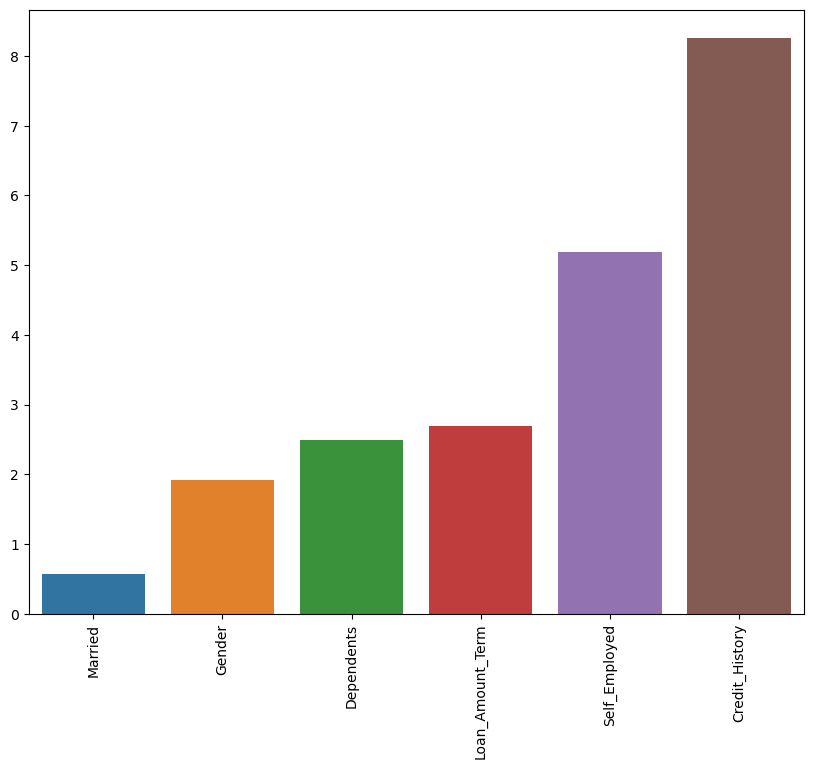

In [8]:
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(x=percent_misg.index, y=percent_misg)
plt.xticks(rotation=90);

- **From above observations we suggest**
    - The observations which which have a missing % less than 1% can be removed.
    - Married have <1% missing and remvoving it will have negligible effect on the data

In [9]:
df.loc[(df['Married'].isnull())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,114100,Male,NaN,NaN,Graduate,No,858600,169650.0,320000,360.0,1.0,Urban,Y
228,133107,Male,NaN,NaN,Graduate,No,1070550,0.0,316000,480.0,1.0,Semiurban,Y
435,579487,Female,NaN,NaN,Graduate,No,2260575,0.0,0,240.0,1.0,Semiurban,Y


**From the above sample of data with Married is having a missing values the dependents are also missing**
 - Therefore We cannot fill the married column using any other feature available to us
 - So it is logical to remove these 3 observations

In [10]:
#dropping these rows for Married is null
df.dropna(axis=0, subset=['Married'], inplace=True)

### Since Loan_ID is unique to each loan application and is not a factor that influencing the creditworthiness of the applicant we can remove the entire column. Also we already have index numbers to identify an Observation

In [11]:
df = df.drop('Loan_ID', axis=1)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [13]:
# # Lets continue with missing values
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [14]:
df.loc[(df['Loan_Amount_Term']>400) & (df['Self_Employed']=='Yes')&(df['Loan_Status']=='Y')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,4537350,0.0,1300000,480.0,NaN,Urban,Y


**There is only one self employed person who  have a tenure > 400**

In [15]:
# df.loc[ (df['ApplicantIncome']>df['LoanAmount'])& (df['Loan_Status']=='Y')& (df['Credit_History'].isnull())]

**It seems from above observation there is no person with 0 credit history having thier Income greater than loan amount with a Y loan status**

In [16]:
df.loc[ (df['ApplicantIncome']>df['LoanAmount'])& (df['Loan_Status']=='Y')& (df['Credit_History'].isnull()),'Credit_History']=1

We are filling those missing data in credit history with 1

In [17]:
percent_misg = percent_missing(df)

In [18]:
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [19]:
df.loc[(df['Loan_Status']=='Y')&(df['Credit_History']==0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,Female,No,0,Graduate,No,480825,2020500.0,274000,360.0,0.0,Semiurban,Y
155,Male,Yes,3+,Graduate,No,8999775,0.0,1200000,180.0,0.0,Semiurban,Y
201,Male,No,2,Graduate,No,1107675,0.0,332000,360.0,0.0,Semiurban,Y
267,Male,Yes,3+,Graduate,No,974925,407475.0,320000,360.0,0.0,Urban,Y
326,Male,No,0,Graduate,No,1106325,0.0,260000,360.0,0.0,Rural,Y
453,Male,Yes,0,Graduate,No,558675,554850.0,180000,180.0,0.0,Rural,Y


Seems like there are lot many entries of accepted loans with a postive credit history than with 0 credit history. From this insight we can fill the missing values of credit historys

In [20]:
df.loc[(df['Loan_Status']=='N')&(df['Credit_History'].isnull()),'Credit_History']=0

In [21]:
# percent_misg = percent_missing(df)
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

Credit history has been removed

In [22]:
df.loc[(df['Gender'].isnull())&(df['Dependents'].isnull())&(df['Loan_Amount_Term'].isnull())&(df['Self_Employed'].isnull())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [23]:
df.shape

(518, 12)

In [24]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term']>400)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,4537350,0.0,1300000,480.0,1.0,Urban,Y


In [25]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term'].isnull())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
44,Male,Yes,0,Not Graduate,Yes,1056375,0.0,192000,NaN,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,1238175,1010250.0,140000,NaN,1.0,Semiurban,Y


Since there is only person with a self employed status with loan term > 400 we can fill the missing values of loan amount term of self employed customers with the mean value of Loan term < 400

In [26]:
selected_rows = df[df['Loan_Amount_Term'] < 400]

# Calculate the average of the Loan_amount column for the selected rows ignoring missing values
loan_term_avg = selected_rows['Loan_Amount_Term'].mean(skipna=True)
loan_term_avg

339.5437881873727

In [27]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term'].isnull()),'Loan_Amount_Term']=340

In [28]:
df.dropna(axis=0, subset=['Dependents'], inplace=True)

Since we cant correctly fill the missing values of dependents we can remove then as it is only <2%

In [29]:
#similarly can remove missing Gender rows
df.dropna(axis=0, subset=['Gender'], inplace=True)

In [30]:
# percent_misg = percent_missing(df)
# plt.figure(figsize=(10,8))
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [31]:
df.loc[(df['Self_Employed'].isnull())&(df['CoapplicantIncome']>0)].shape

(15, 12)

- the number of peope who are self employed and have a co applicant are much less than the number of people who are not self employed and have a co applicant

In [32]:
df.loc[(df['Self_Employed'].isnull())&(df['CoapplicantIncome']>0),'Self_Employed']='No'

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [34]:
df.dropna(axis=0, subset=['Loan_Amount_Term','Self_Employed'], inplace=True)

In [35]:
df.shape

(474, 12)

In [36]:
#Applying OHE with drop first not enable and will remove redundant manually
# df = pd.get_dummies(df, drop_first=False)

In [37]:
# df= df.drop('Gender_Female',axis=1)
# df = df.drop('Married_No',axis=1)
# df = df.drop('Education_Not Graduate',axis=1)
# df = df.drop('Self_Employed_No',axis = 1)
# df = df.drop('Loan_Status_N',axis = 1)

In [38]:
df.isnull().sum() #verifying no null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Hypothesis testing for categorical features

1. Null Hypothesis, N0: Features are insignificant to loan status. Na : has significant effect

Conducting Chi2 test for independence

In [39]:
from scipy.stats import chi2_contingency

In [40]:
# Create a contingency table
cont_table = pd.crosstab(df['Gender'], df['Loan_Status'])

# Conduct the chi-square test
chi2, pval, dof, exp_freq = chi2_contingency(cont_table)

# Print the p-value
print('p-value:', pval)

p-value: 0.6501405284407019


**There fore we fail to reject the Null hypothesis(considering a significance level of 0.05). Gender do not affect the Loan Status**

In [41]:

# Loop through each categorical feature and perform a chi-square test with the target variable
cat_cols = ['Gender', 'Education', 'Self_Employed', 'Property_Area','Married']
# Set the significance level
alpha = 0.05
pvalue_C=[]

# Loop through each categorical feature and perform a chi-square test with the target variable
for col in cat_cols:
    cont_table = pd.crosstab(df[col], df['Loan_Status'])
    chi2, pval, dof, exp_freq = chi2_contingency(cont_table)
    pvalue_C.append(pval)
    if pval < alpha:
        print(f"{col} vs LoanStatus is significant (p-value: {pval})")
    else:
        print(f"{col} vs LoanStatus is not significant (p-value: {pval})")

Gender vs LoanStatus is not significant (p-value: 0.6501405284407019)
Education vs LoanStatus is not significant (p-value: 0.0964040078580344)
Self_Employed vs LoanStatus is not significant (p-value: 0.8439514357511773)
Property_Area vs LoanStatus is significant (p-value: 0.0009191785863088136)
Married vs LoanStatus is significant (p-value: 0.04117253465094671)


## ANOVA test for Numerical features

In [42]:
from scipy.stats import f_oneway

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             474 non-null    object 
 1   Married            474 non-null    object 
 2   Dependents         474 non-null    object 
 3   Education          474 non-null    object 
 4   Self_Employed      474 non-null    object 
 5   ApplicantIncome    474 non-null    int64  
 6   CoapplicantIncome  474 non-null    float64
 7   LoanAmount         474 non-null    int64  
 8   Loan_Amount_Term   474 non-null    float64
 9   Credit_History     474 non-null    float64
 10  Property_Area      474 non-null    object 
 11  Loan_Status        474 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 48.1+ KB


In [44]:
df.loc[(df['Dependents']=='3+'),'Dependents']=3

In [45]:
#converting the dependent column to int64
df['Dependents'] = df['Dependents'].astype('int64')

In [46]:
num_cols = ['Dependents', 'LoanAmount', 'Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','Credit_History']
alpha = 0.05
pvalues = []
# Perform ANOVA for each numerical feature with the target variable
for col in num_cols:
    # Split the data into multiple groups based on the target variable
    groups = []
    for group_name in df['Loan_Status'].unique():
        group = df[df['Loan_Status'] == group_name][col]
        groups.append(group)
    
    # Perform ANOVA
    fstat, pval = f_oneway(*groups)
    pvalues.append(pval)
    # Print the result
    if pval < alpha:
        print(f"{col} vs LoanStatus is significant (p-value = {pval:.3f})")
    else:
        print(f"{col} vs LoanStatus is not significant (p-value = {pval:.3f})")


Dependents vs LoanStatus is not significant (p-value = 0.610)
LoanAmount vs LoanStatus is not significant (p-value = 0.073)
Loan_Amount_Term vs LoanStatus is not significant (p-value = 0.541)
ApplicantIncome vs LoanStatus is not significant (p-value = 0.122)
CoapplicantIncome vs LoanStatus is not significant (p-value = 0.712)
Credit_History vs LoanStatus is significant (p-value = 0.000)


In [47]:
# fig, ax = plt.subplots(figsize=(14,6))
# ax.bar(num_cols, pvalues)
# ax.set_ylabel('p-value')
# ax.set_ylim([0, 1])
# ax.axhline(y=alpha, color='r', linestyle='--')
# ax.set_title('ANOVA p-values for numerical features vs LoanStatus')
# plt.show()

In [48]:
# fig, ax = plt.subplots(figsize=(14,6))
# ax.bar(cat_cols, pvalue_C)
# ax.set_ylabel('p-value ')
# ax.set_ylim([0, 1])
# ax.axhline(y=alpha, color='r', linestyle='--')
# ax.set_title('Chi2 p-values for Categorical vs LoanStatus')
# plt.show()

## Visualizations of categotrical features with Loan status


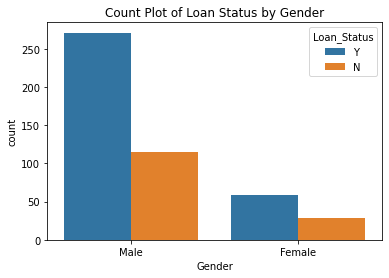

In [49]:
sns.countplot(x='Gender', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Gender');

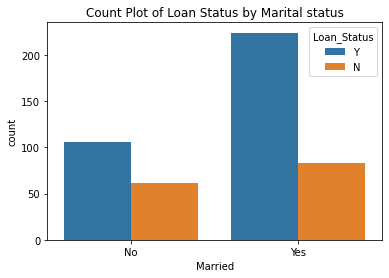

In [50]:
sns.countplot(x='Married', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Marital status');

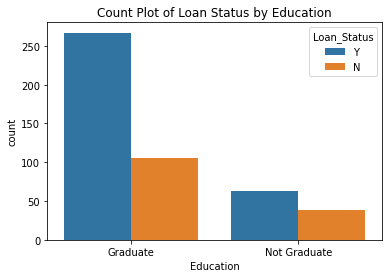

In [51]:
sns.countplot(x='Education', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Education');

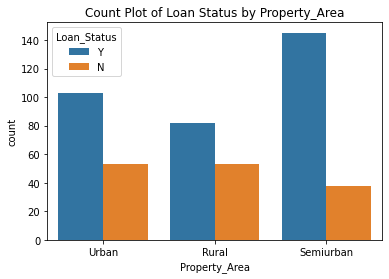

In [52]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Property_Area');

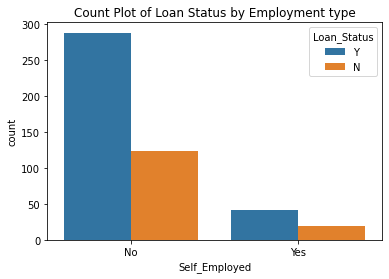

In [53]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Employment type');

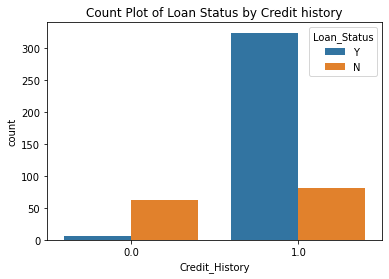

In [54]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Credit history');

## Numerical features with respect to Loan Status

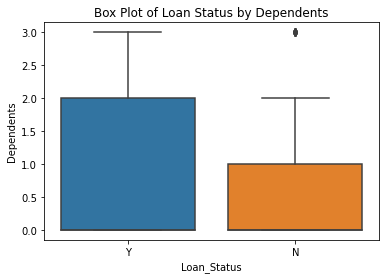

In [55]:
sns.boxplot(x='Loan_Status', y='Dependents', data=df)
plt.title('Box Plot of Loan Status by Dependents');
plt.show()

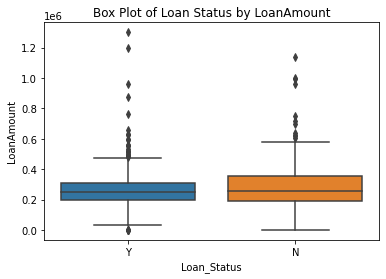

In [56]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Box Plot of Loan Status by LoanAmount');
plt.show()

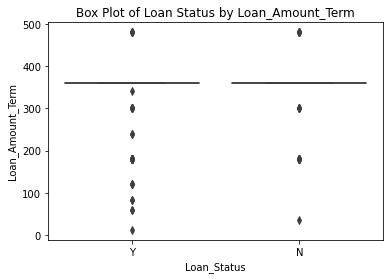

In [57]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)
plt.title('Box Plot of Loan Status by Loan_Amount_Term');
plt.show()

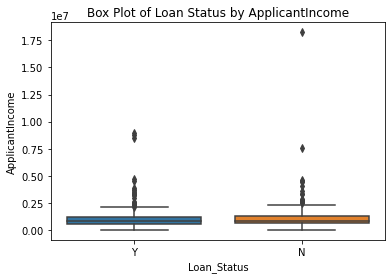

In [58]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Box Plot of Loan Status by ApplicantIncome');
plt.show()

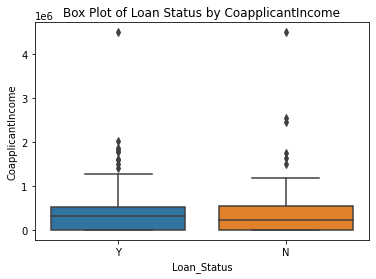

In [59]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Box Plot of Loan Status by CoapplicantIncome');
plt.show()

In [60]:
def centralTendencies(feature):
    mean = df[feature].mean()
    median = df[feature].median()
    mode = df[feature].mode()

    print('Mean:', mean)
    print('Median:', median)
    print('Mode:', mode)

Text(0.5, 1.0, 'Loan Amount Histogram with respect to Loan Status')

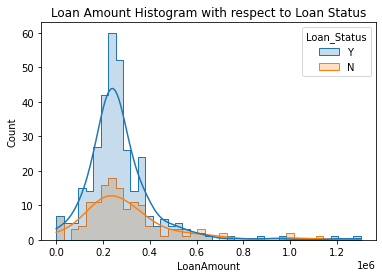

In [61]:
# Create histograms for the continuous features with respect to Loan_Status
sns.histplot(data=df, x='LoanAmount', hue='Loan_Status', element='step', kde=True)
plt.title('Loan Amount Histogram with respect to Loan Status')


In [62]:
centralTendencies('LoanAmount')

Mean: 277447.25738396624
Median: 250000.0
Mode: 0    240000
dtype: int64


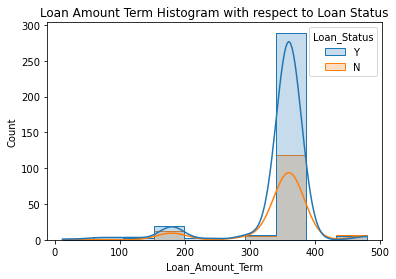

In [63]:
sns.histplot(data=df, x='Loan_Amount_Term', hue='Loan_Status', element='step', kde=True)
plt.title('Loan Amount Term Histogram with respect to Loan Status');

In [64]:
centralTendencies('Loan_Amount_Term')

Mean: 343.831223628692
Median: 360.0
Mode: 0    360.0
dtype: float64


Text(0.5, 1.0, 'Applicant Income Histogram with respect to Loan Status')

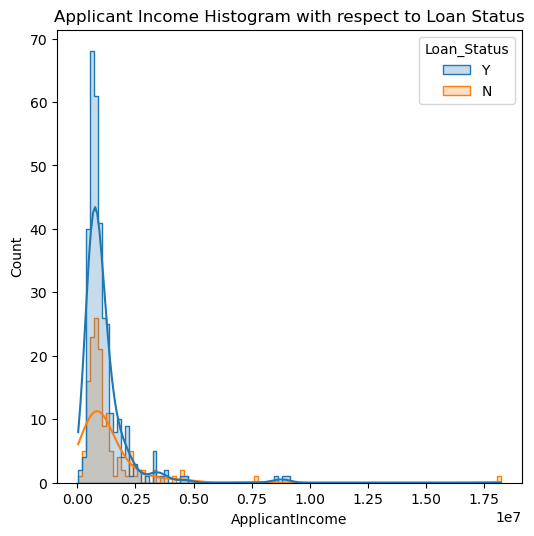

In [65]:
plt.figure(figsize=(6,6),dpi=100)
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', element='step', kde=True)
plt.title('Applicant Income Histogram with respect to Loan Status')

In [66]:
centralTendencies('ApplicantIncome')

Mean: 1179063.6075949366
Median: 856350.0
Mode: 0    562500
dtype: int64


Text(0.5, 1.0, 'Coapplicant Income Histogram with respect to Loan Status')

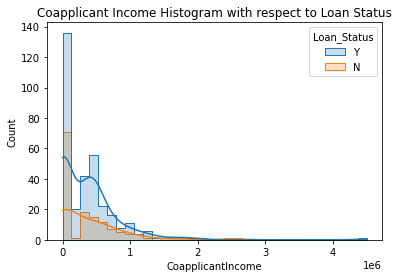

In [67]:
sns.histplot(data=df, x='CoapplicantIncome', hue='Loan_Status', element='step', kde=True)
plt.title('Coapplicant Income Histogram with respect to Loan Status')

In [68]:
centralTendencies('CoapplicantIncome')

Mean: 359920.21518457594
Median: 291037.5
Mode: 0    0.0
dtype: float64


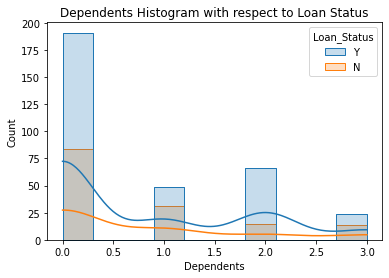

In [69]:
sns.histplot(data=df, x='Dependents', hue='Loan_Status', element='step', kde=True)
plt.title('Dependents Histogram with respect to Loan Status');

In [70]:
centralTendencies('Dependents')

Mean: 0.7510548523206751
Median: 0.0
Mode: 0    0
dtype: int64


## Feature Engineering 

- For the continuous features we couldn't draw any insigts from the charts 
- Missing values has been treated 


In [71]:
def iqr(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    min_value = df[feature].min()
    max_value = df[feature].max()

    print('Minimum value:', min_value)
    print('Maximum value:', max_value)

    print('Q1:', Q1)
    print('Q3:', Q3)
    print('IQR:', IQR)

### Lets categorize the continous values into ranges using bucketing

In [72]:
#Loan Amount
# LoanAmount column into 4 equal-sized buckets based on quantiles.
df['LoanAmount_Ranges'] = pd.qcut(df['LoanAmount'], q=4)
print(df[['LoanAmount', 'LoanAmount_Ranges']].head())

   LoanAmount     LoanAmount_Ranges
0      250000  (194500.0, 250000.0]
1      256000  (250000.0, 320000.0]
2      132000    (-0.001, 194500.0]
3      240000  (194500.0, 250000.0]
4      282000  (250000.0, 320000.0]


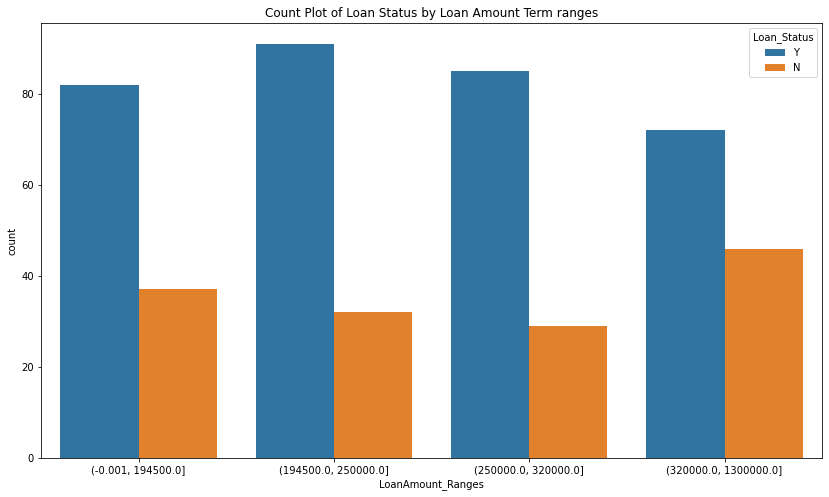

In [73]:
plt.figure(figsize=(14,8))
sns.countplot(x='LoanAmount_Ranges', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Loan Amount Term ranges');

Let evaluate using a cisquare test with alpha =0.05

In [74]:
def chi2(feature,alpha):

    cont_table = pd.crosstab(df[feature], df['Loan_Status'])
    chi2, pval, dof, exp_freq = chi2_contingency(cont_table)
    pvalue_C.append(pval)
    if pval < alpha:
        print(f"{col} vs LoanStatus is significant (p-value: {pval})")
    else:
        print(f"{col} vs LoanStatus is not significant (p-value: {pval})")
        
chi2('LoanAmount_Ranges',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.08651243532857254)


## Observations

- from the barplot we can obeserve that the Loan Amount varies under 2% between the ranges
- chi2 test shows the same

In [75]:
#Loan Amount Term
iqr('Loan_Amount_Term')

Minimum value: 12.0
Maximum value: 480.0
Q1: 360.0
Q3: 360.0
IQR: 0.0


In [76]:
df['Loan_Amount_Term_Range'] = pd.cut(df['Loan_Amount_Term'], bins=[0,360, 480],
                                       labels=['Short', 'Long'], duplicates='drop')


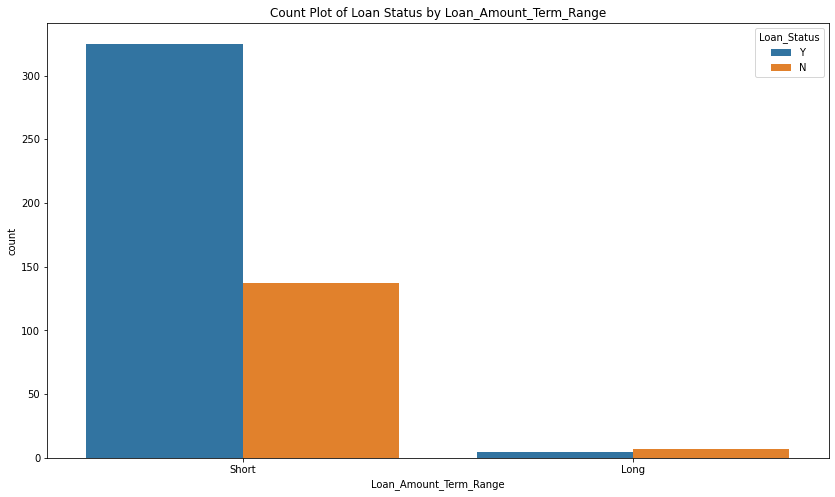

In [77]:
plt.figure(figsize=(14,8))
sns.countplot(x='Loan_Amount_Term_Range', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Loan_Amount_Term_Range');

In [78]:
chi2('Loan_Amount_Term_Range',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.06954927355534393)


## Observations

- From the bar plot the ratio of change between yes/ no is not > 5%
- chi2 test shows the same


In [79]:
#ApplicantIncome
iqr('ApplicantIncome')

Minimum value: 33750
Maximum value: 18225000
Q1: 624712.5
Q3: 1284018.75
IQR: 659306.25


In [80]:
df['ApplicantIncome_Range'] = pd.qcut(df['ApplicantIncome'], q=4)

# view the result
print(df[['ApplicantIncome', 'ApplicantIncome_Range']].head())

   ApplicantIncome     ApplicantIncome_Range
0          1316025  (1284018.75, 18225000.0]
1          1031175    (856350.0, 1284018.75]
2           675000      (624712.5, 856350.0]
3           581175     (33749.999, 624712.5]
4          1350000  (1284018.75, 18225000.0]


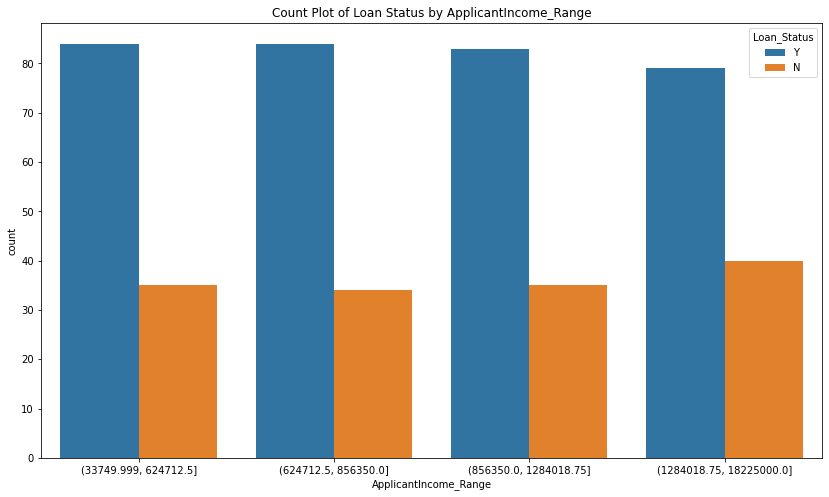

In [81]:
plt.figure(figsize=(14,8))
sns.countplot(x='ApplicantIncome_Range', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by ApplicantIncome_Range');

In [82]:
chi2('ApplicantIncome_Range',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.8478573421992309)


## Observations

- There is not much variations in terms of applicant income as per the bar plot
- chi2 test seconds above observation

In [83]:
iqr('CoapplicantIncome')

Minimum value: 0.0
Maximum value: 4500000.0
Q1: 0.0
Q3: 524756.25
IQR: 524756.25


In [84]:
centralTendencies('CoapplicantIncome')

Mean: 359920.21518457594
Median: 291037.5
Mode: 0    0.0
dtype: float64


In [85]:
df['CoapplicantIncome_Range'] = pd.cut(df['CoapplicantIncome'], bins=[0,350000, 500000,1000000,1500000,2500000,4500000],
                                       duplicates='drop')

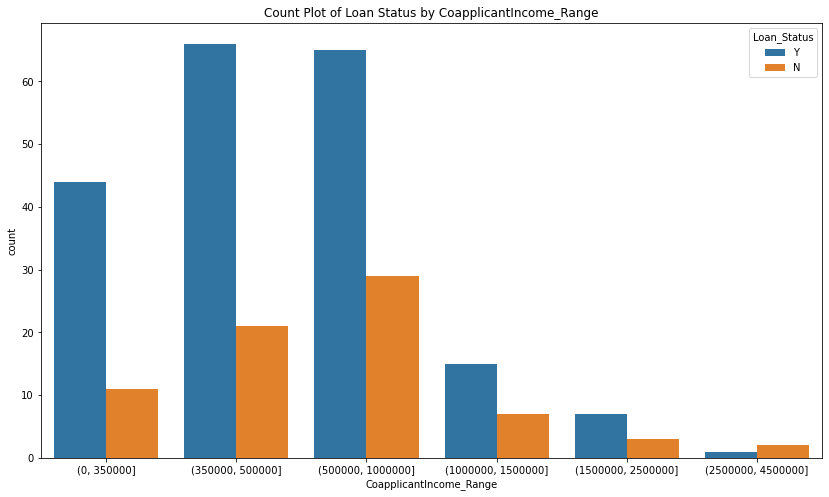

In [86]:
plt.figure(figsize=(14,8))
sns.countplot(x='CoapplicantIncome_Range', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by CoapplicantIncome_Range');

In [87]:
chi2('CoapplicantIncome_Range',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.39869440810881307)


## Observations

- for some ranges[0-3500000] of co applicant income the difference seems significant 
- how ever chi2 test donot seconds the statement

In [88]:
#Dependents
iqr('Dependents')

Minimum value: 0
Maximum value: 3
Q1: 0.0
Q3: 1.75
IQR: 1.75


In [89]:
centralTendencies('Dependents')

Mean: 0.7510548523206751
Median: 0.0
Mode: 0    0
dtype: int64


In [90]:
df['Dependents_Range'] = pd.cut(df['Dependents'], bins=[0,1,2,3],
                                       duplicates='drop')

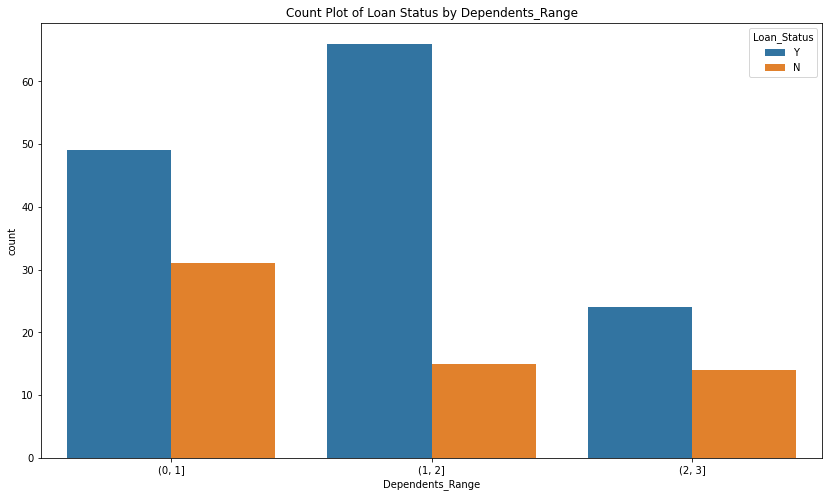

In [91]:
plt.figure(figsize=(14,8))
sns.countplot(x='Dependents_Range', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Dependents_Range');

In [92]:
chi2('Dependents_Range',0.05)

Credit_History vs LoanStatus is significant (p-value: 0.01214878196522649)


## Observations 

- Theres is nearly a 5% difference in loan status for those who have a dependents in between 1 and 2 
-  chi2 test seconds this observation 

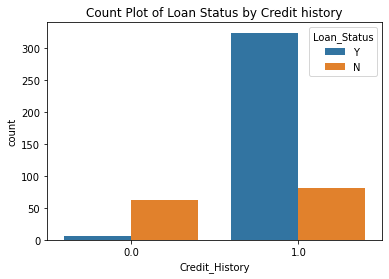

In [93]:
#credit history
sns.countplot(x='Credit_History', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Credit history');

## Observations

- There is nearly a 5% difference bw Y/N for people with a +ve credit which means this is a significant feature by observing the plot

### Creating a new feature from Applicant income+Co applicant income and checking with Loan Amount

In [94]:
df['LoanAmoutgreaterthanApplicantandCoapplicantIncome'] = np.where(df['ApplicantIncome'] + df['CoapplicantIncome'] >= df['LoanAmount'], 'Yes', 'No')


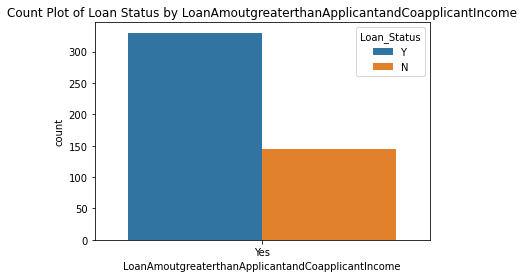

In [95]:
sns.countplot(x='LoanAmoutgreaterthanApplicantandCoapplicantIncome', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by LoanAmoutgreaterthanApplicantandCoapplicantIncome');

In [96]:
chi2('LoanAmoutgreaterthanApplicantandCoapplicantIncome',0.05)

Credit_History vs LoanStatus is not significant (p-value: 1.0)


In [97]:
df = df.drop('LoanAmoutgreaterthanApplicantandCoapplicantIncome',axis=1)

### Observation

- not much variation is being observed
- chi2 test seconds it
- so dropping the feature

## Debt to income ratio

Creating a new feature by dividing the Loan Amount by the sum of the Applicant Income and Coapplicant Income. This can give an idea of how much debt the borrower is taking on relative to their income.

In [98]:
df['Debt_to_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'])


Text(0.5, 1.0, 'Debt_to_Income_Ratio Histogram with respect to Loan Status')

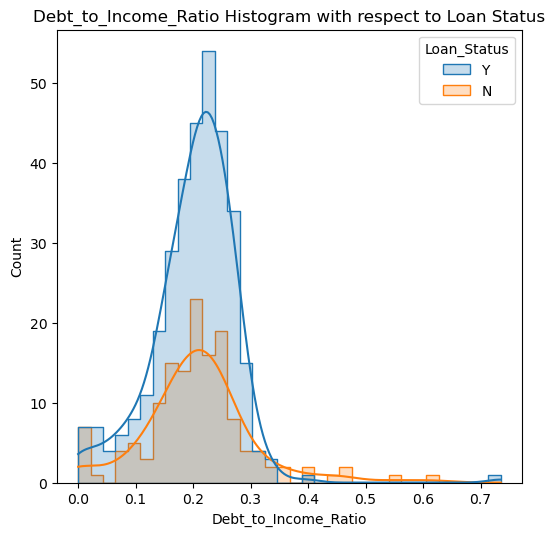

In [99]:
plt.figure(figsize=(6,6),dpi=100)
sns.histplot(data=df, x='Debt_to_Income_Ratio', hue='Loan_Status', element='step', kde=True)
plt.title('Debt_to_Income_Ratio Histogram with respect to Loan Status')

In [100]:
centralTendencies('Debt_to_Income_Ratio')

Mean: 0.2035447094434678
Median: 0.2105262419304647
Mode: 0    0.0
dtype: float64


In [101]:
#buketing to get a better view
#qunatile buketing
df['Debt_to_Income_Ratio_Ranges'] = pd.qcut(df['Debt_to_Income_Ratio'], q=4)

print(df[['Debt_to_Income_Ratio', 'Debt_to_Income_Ratio_Ranges']].head())

   Debt_to_Income_Ratio Debt_to_Income_Ratio_Ranges
0              0.189966              (0.162, 0.211]
1              0.186797              (0.162, 0.211]
2              0.195556              (0.162, 0.211]
3              0.215881              (0.211, 0.247]
4              0.208889              (0.162, 0.211]


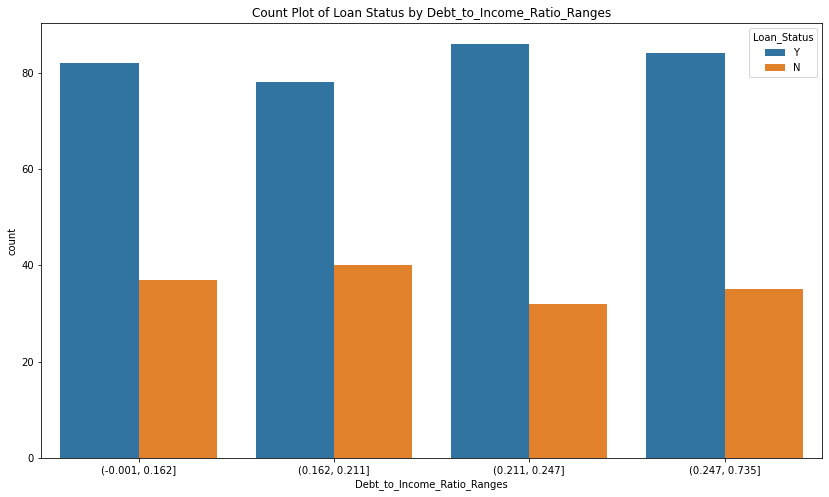

In [102]:
plt.figure(figsize=(14,8))
sns.countplot(x='Debt_to_Income_Ratio_Ranges', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Debt_to_Income_Ratio_Ranges');

In [103]:
chi2('Debt_to_Income_Ratio_Ranges',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.7136829904827335)


## Observation

- Not impacting

In [104]:
df = df.drop('Debt_to_Income_Ratio_Ranges',axis=1)
df = df.drop('Debt_to_Income_Ratio',axis=1)

In [105]:
#Loan Amount per term feature

In [106]:
df['LoanAmountPerTerm'] = df['LoanAmount'] / df['Loan_Amount_Term']

Text(0.5, 1.0, 'LoanAmountPerTerm Histogram with respect to Loan Status')

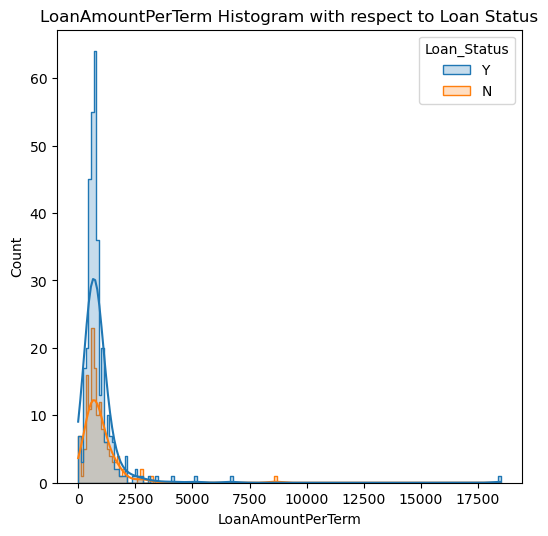

In [107]:
plt.figure(figsize=(6,6),dpi=100)
sns.histplot(data=df, x='LoanAmountPerTerm', hue='Loan_Status', element='step', kde=True)
plt.title('LoanAmountPerTerm Histogram with respect to Loan Status')

In [108]:
centralTendencies('LoanAmountPerTerm')

Mean: 901.6870594932766
Median: 713.8888888888889
Mode: 0    666.666667
dtype: float64


In [109]:
#buketing to get a better view
#qunatile buketing
df['LoanAmountPerTerm_Ranges'] = pd.qcut(df['LoanAmountPerTerm'], q=4)

print(df[['LoanAmountPerTerm', 'LoanAmountPerTerm_Ranges']].head())

   LoanAmountPerTerm LoanAmountPerTerm_Ranges
0         694.444444       (545.833, 713.889]
1         711.111111       (545.833, 713.889]
2         366.666667        (-0.001, 545.833]
3         666.666667       (545.833, 713.889]
4         783.333333       (713.889, 986.111]


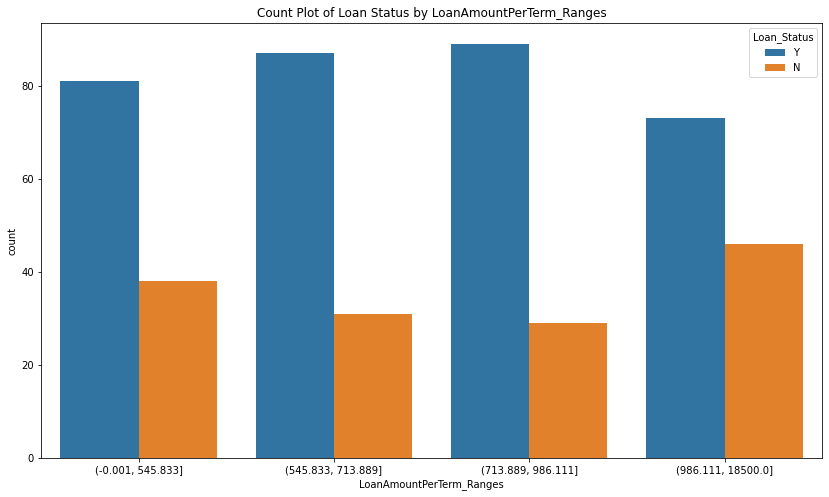

In [110]:
plt.figure(figsize=(14,8))
sns.countplot(x='LoanAmountPerTerm_Ranges', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by LoanAmountPerTerm_Ranges');

In [111]:
chi2('LoanAmountPerTerm_Ranges',0.05)

Credit_History vs LoanStatus is not significant (p-value: 0.07821140584701472)


## Observation 
- variations in graph stays <= 3% implies not impacting 
- chi2 test seconds 

In [112]:
df = df.drop('LoanAmountPerTerm_Ranges',axis=1)
df = df.drop('LoanAmountPerTerm',axis=1)

In [113]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Ranges,Loan_Amount_Term_Range,ApplicantIncome_Range,CoapplicantIncome_Range,Dependents_Range
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,"(194500.0, 250000.0]",Short,"(1284018.75, 18225000.0]",NaN,NaN
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,"(250000.0, 320000.0]",Short,"(856350.0, 1284018.75]","(0.0, 350000.0]","(0.0, 1.0]"
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,"(-0.001, 194500.0]",Short,"(624712.5, 856350.0]",NaN,NaN
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,"(194500.0, 250000.0]",Short,"(33749.999, 624712.5]","(500000.0, 1000000.0]",NaN
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,"(250000.0, 320000.0]",Short,"(1284018.75, 18225000.0]",NaN,NaN


In [114]:
df=df.drop('CoapplicantIncome_Range',axis=1)
df=df.drop('ApplicantIncome_Range',axis=1)
df=df.drop('Loan_Amount_Term_Range',axis=1)


In [115]:
df['Dependents_Range'] = df['Dependents_Range'].cat.add_categories(['0'])


In [116]:
df['Dependents_Range'].fillna('0', inplace=True)

In [117]:
df['FamilyFinancePlan'] = np.where((df['Dependents'] <= 2) & (df['ApplicantIncome'] + df['CoapplicantIncome'] >= df['LoanAmount']), 'Yes', 'No')


In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Ranges,Dependents_Range,FamilyFinancePlan
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,"(194500.0, 250000.0]",0,Yes
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,"(250000.0, 320000.0]","(0, 1]",Yes
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,"(-0.001, 194500.0]",0,Yes
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,"(194500.0, 250000.0]",0,Yes
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,"(250000.0, 320000.0]",0,Yes


In [119]:
# df=df.drop('isEmployee',axis=1)

In [120]:
# create new feature RepaymentCapacity
df['RepaymentCapacity'] = ((df['ApplicantIncome'] + df['CoapplicantIncome'])/df['LoanAmount'] >= 0.5) & (df['Credit_History'] == 1)

# map boolean values to 'Yes' and 'No'
df['RepaymentCapacity'] = df['RepaymentCapacity'].map({True: 'Yes', False: 'No'})


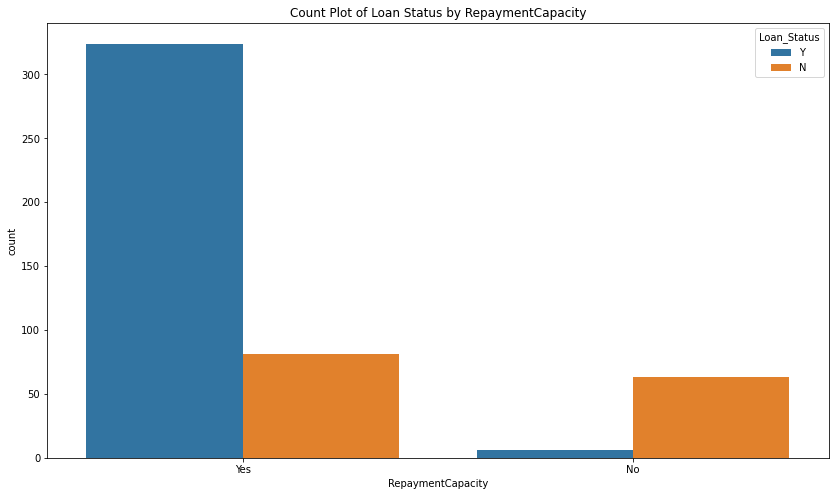

In [121]:
plt.figure(figsize=(14,8))
sns.countplot(x='RepaymentCapacity', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by RepaymentCapacity');

In [122]:
chi2('RepaymentCapacity',0.05)

Credit_History vs LoanStatus is significant (p-value: 6.04575335290509e-32)


In [123]:
df['PropertyValuingCustomer'] = np.where((df['Property_Area'].isin(['Urban', 'Semiurban'])) & (df['Credit_History']==1), 'Yes', 'No')


In [124]:
chi2('PropertyValuingCustomer',0.05)

Credit_History vs LoanStatus is significant (p-value: 1.4933993284493844e-16)


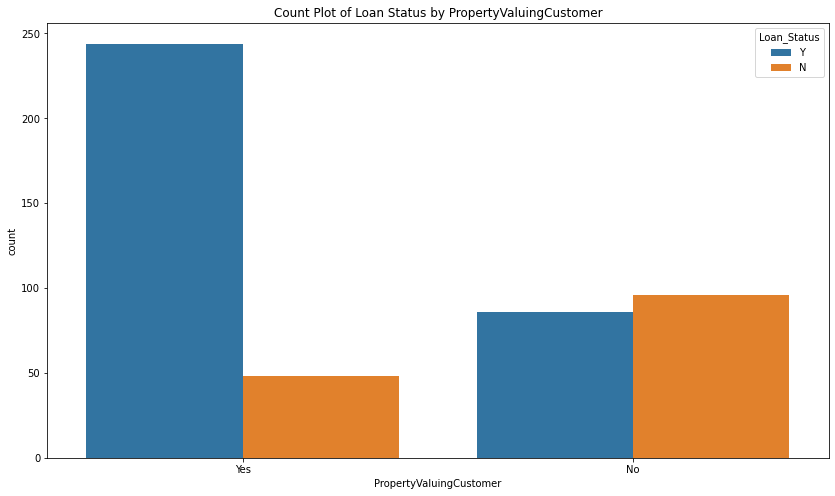

In [125]:
plt.figure(figsize=(14,8))
sns.countplot(x='PropertyValuingCustomer', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by PropertyValuingCustomer');

In [126]:
df['genderCredit'] = np.where((df['Gender'] == 'Male') & (df['Credit_History'] == 1), 'Yes', 'No')


In [127]:
chi2('genderCredit',0.05)

Credit_History vs LoanStatus is significant (p-value: 2.7848666198204226e-15)


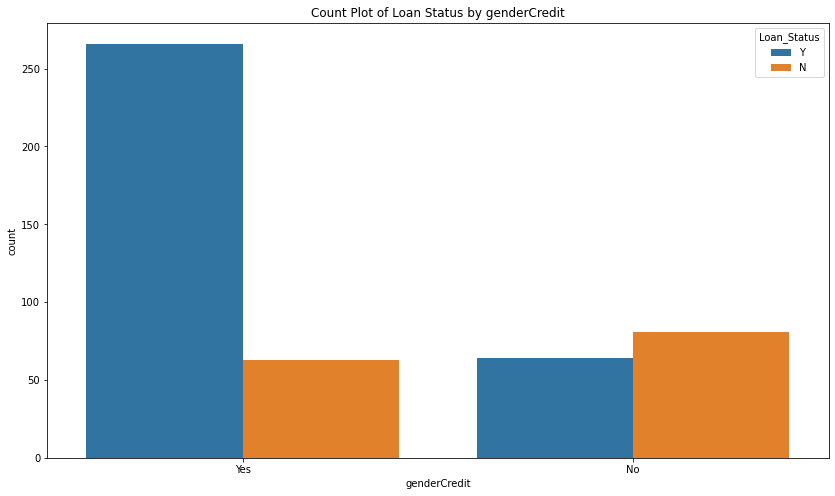

In [128]:
plt.figure(figsize=(14,8))
sns.countplot(x='genderCredit', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by genderCredit');

## Newly created features
- genderCredit (persons with males and having a credt history of 1)
- PropertyValuingCustomer (customers with their property area in urban and having credit history +ve)
- RepaymentCapacity (customers with income to total Debit ratio more than 50% and having credit history of 1)

# One hot encoding

In [129]:
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'LoanAmount_Ranges', 'Dependents_Range', 'FamilyFinancePlan', 'RepaymentCapacity', 'PropertyValuingCustomer', 'genderCredit']

# Perform one-hot encoding
df2 = pd.get_dummies(df, columns=columns_to_encode,drop_first=True)


In [130]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,...,"LoanAmount_Ranges_(194500.0, 250000.0]","LoanAmount_Ranges_(250000.0, 320000.0]","LoanAmount_Ranges_(320000.0, 1300000.0]","Dependents_Range_(1, 2]","Dependents_Range_(2, 3]",Dependents_Range_0,FamilyFinancePlan_Yes,RepaymentCapacity_Yes,PropertyValuingCustomer_Yes,genderCredit_Yes
0,1316025,0.0,250000,360.0,1.0,Y,1,0,0,0,...,1,0,0,0,0,1,1,1,1,1
1,1031175,339300.0,256000,360.0,1.0,N,1,1,1,0,...,0,1,0,0,0,0,1,1,0,1
2,675000,0.0,132000,360.0,1.0,Y,1,1,0,0,...,0,0,0,0,0,1,1,1,1,1
3,581175,530550.0,240000,360.0,1.0,Y,1,1,0,0,...,1,0,0,0,0,1,1,1,1,1
4,1350000,0.0,282000,360.0,1.0,Y,1,0,0,0,...,0,1,0,0,0,1,1,1,1,1


In [131]:
df2.shape

(474, 25)

# Outlier treatment

In [132]:
# Q1 = df['Loan_Amount_Term'].quantile(0.25)
# Q3 = df['Loan_Amount_Term'].quantile(0.75)
# IQR = Q3 - Q1
# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR

# df = df[(df['Loan_Amount_Term'] >= lower_limit) & (df['Loan_Amount_Term'] <= upper_limit)]


In [133]:
# Decided not to go for outlier treatment as just by doing IQR method removes a considerable ammount of rows 

## Scaling the data

In [134]:
X =  df2.drop('Loan_Status',axis=1)

In [135]:
y = df2['Loan_Status']

In [136]:
#train_test split
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [138]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# # Select the continuous features to scale
# continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# # Scale the continuous features
# df2[continuous_features] = scaler.fit_transform(df2[continuous_features])

In [139]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Log Model

In [140]:
from sklearn.linear_model import LogisticRegressionCV 

In [141]:
logModel=LogisticRegressionCV()

In [142]:
logModel.fit(X_train_scaled,y_train)

LogisticRegressionCV()

In [143]:
logModel.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [144]:
logModel.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [145]:
logModel.coef_

array([[-0.0090343 , -0.00298624, -0.02668678, -0.0192567 ,  0.24383123,
        -0.00130124,  0.05713372, -0.06391193,  0.05301422, -0.00294925,
        -0.03281996,  0.0043747 ,  0.09658287, -0.05071544,  0.03920084,
         0.0524367 , -0.06304917,  0.05301422, -0.00294925,  0.00782431,
         0.00294925,  0.24383123,  0.1645773 ,  0.15359865]])

In [146]:
coefs = pd.Series(index=X.columns,data=logModel.coef_[0])

In [147]:
coefs = coefs.sort_values()

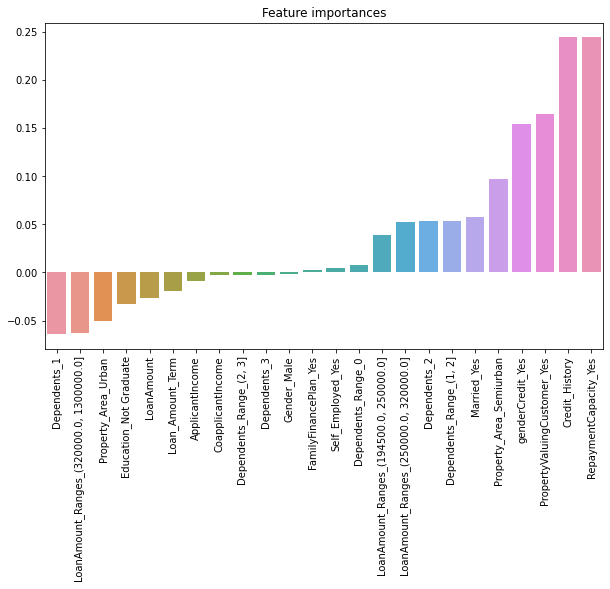

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);
plt.title('Feature importances');
plt.xticks(rotation=90);

In [149]:
y_train_pred = logModel.predict(X_train_scaled) 

In [150]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred) 

0.812206572769953

In [151]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

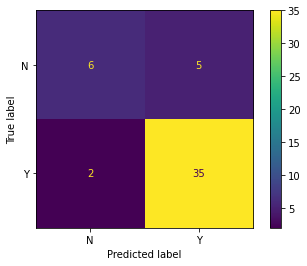

In [152]:
y_pred = logModel.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(logModel,X_test_scaled,y_test);

### Log model Report

In [153]:
print(classification_report(y_train,y_train_pred)) ##Training Table

              precision    recall  f1-score   support

           N       0.93      0.43      0.59       133
           Y       0.79      0.99      0.88       293

    accuracy                           0.81       426
   macro avg       0.86      0.71      0.73       426
weighted avg       0.84      0.81      0.79       426



In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.75      0.55      0.63        11
           Y       0.88      0.95      0.91        37

    accuracy                           0.85        48
   macro avg       0.81      0.75      0.77        48
weighted avg       0.85      0.85      0.85        48



## Training accuracy score 81% & Testing accuracy 85%

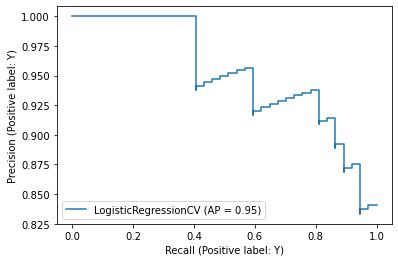

In [155]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(logModel,X_test_scaled,y_test);

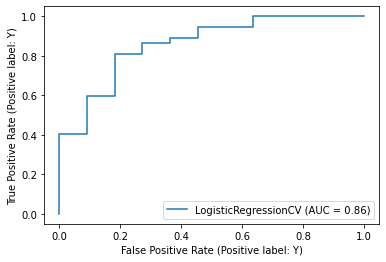

In [156]:
plot_roc_curve(logModel,X_test_scaled,y_test)

- precsion and recall seems not good for No but better for Yes status

## SVM Classifier

In [157]:
from sklearn.svm import SVC

In [158]:
svc= SVC(class_weight='balanced')
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [159]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [160]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [161]:
y_train_pred = grid.predict(X_train_scaled) 

In [162]:
metrics.accuracy_score(y_train, y_train_pred) 

0.8427230046948356

### confusion Matrix

In [163]:
from sklearn.metrics import confusion_matrix, classification_report

In [164]:
grid_preds=grid.predict(X_test_scaled)

In [165]:
confusion_matrix(y_test,grid_preds)

array([[ 8,  3],
       [ 6, 31]])

In [166]:
print(classification_report(y_train,y_train_pred)) ##Training Table

              precision    recall  f1-score   support

           N       0.86      0.59      0.70       133
           Y       0.84      0.96      0.89       293

    accuracy                           0.84       426
   macro avg       0.85      0.77      0.80       426
weighted avg       0.84      0.84      0.83       426



In [167]:
print(classification_report(y_test,grid_preds)) ## testing result

              precision    recall  f1-score   support

           N       0.57      0.73      0.64        11
           Y       0.91      0.84      0.87        37

    accuracy                           0.81        48
   macro avg       0.74      0.78      0.76        48
weighted avg       0.83      0.81      0.82        48



## KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
KNN=KNeighborsClassifier()

In [170]:
flow=[('scaler',scaler),('KNN',KNN)]

In [171]:
from sklearn.pipeline import Pipeline

In [172]:
pipe=Pipeline(flow)

This will scale the data and perfom KNN with with defaults but we still want to get the best k which minimizes both acccuracy and complexity. So im going for a grid search on this KNN model

In [173]:
kRanges=list(range(1,30))

In [174]:
param_grid={'KNN__n_neighbors':kRanges}

In [175]:
classifier=GridSearchCV(pipe, param_grid,cv=5,scoring='accuracy')

In [176]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [177]:
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 20,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}

In [178]:
y_train_pred = classifier.predict(X_train_scaled) 

In [179]:
metrics.accuracy_score(y_train, y_train_pred)

0.7629107981220657

<AxesSubplot:>

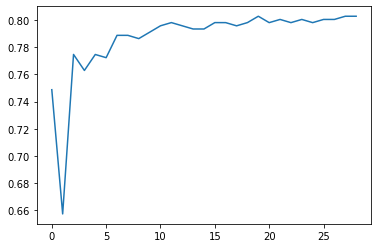

In [180]:
pd.DataFrame(classifier.cv_results_)['mean_test_score'].plot()

### Reports KNN

In [181]:
y_pred=classifier.predict(X_test_scaled)

In [182]:
confusion_matrix(y_test,y_pred)

array([[ 5,  6],
       [ 8, 29]])

In [183]:
print(classification_report(y_train,y_train_pred)) ##Training Table

              precision    recall  f1-score   support

           N       0.66      0.50      0.57       133
           Y       0.79      0.88      0.84       293

    accuracy                           0.76       426
   macro avg       0.73      0.69      0.70       426
weighted avg       0.75      0.76      0.75       426



In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.38      0.45      0.42        11
           Y       0.83      0.78      0.81        37

    accuracy                           0.71        48
   macro avg       0.61      0.62      0.61        48
weighted avg       0.73      0.71      0.72        48



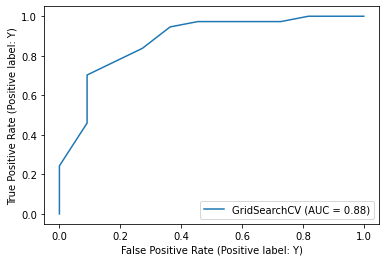

In [185]:
plot_roc_curve(classifier,X_test,y_test)

## Random Forest Classifier

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
n_estimators=[64,100,120,200]

In [188]:
max_features=[2,3,4]

In [189]:
bootstrap=[True,False]

In [190]:
oob_score= [True,False]

In [191]:
param_grid={'n_estimators':n_estimators, 
            'max_features':max_features,
            'bootstrap':bootstrap,
            'oob_score':oob_score
           }

In [192]:
rfc=RandomForestClassifier()
grid= GridSearchCV(rfc,param_grid)

In [193]:
grid.fit(X_train_scaled,y_train)

/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/akhil/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79578659 0.79343365 0.78872777 0.78870041 0.78402189 0.80046512
 0.78872777 0.79343365 0.77934337 0.78875513 0.79346101 0.78870041
 0.79340629 0.805171   0.79108071 0.78640219 0.78402189 0.78870041
 0.79105335 0.80284542 0.78637483 0.79578659 0.77934337 0.78875513
        nan 0.77696306        nan 0.78872777        nan 0.79578659
        nan 0.78870041        nan 0.79346101        nan 0.79578659
        nan 0.79343365        nan 0.79575923        nan 0.79105335
        nan 0.79110807        nan 0.78870041        nan 0.77934337]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 120, 200],
                         'oob_score': [True, False]})

In [194]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 120, 'oob_score': False}

In [195]:

rfc=RandomForestClassifier(max_features=4,n_estimators=100,oob_score=True)

In [196]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(max_features=4, oob_score=True)

In [197]:
y_train_pred = rfc.predict(X_train_scaled) 

In [198]:
metrics.accuracy_score(y_train, y_train_pred) 

1.0

In [199]:
rfc.oob_score_

0.7793427230046949

In [200]:
prediction= rfc.predict(X_test_scaled)

In [201]:
print(classification_report(y_train,y_train_pred)) ##Training Table

              precision    recall  f1-score   support

           N       1.00      1.00      1.00       133
           Y       1.00      1.00      1.00       293

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [202]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           N       0.64      0.64      0.64        11
           Y       0.89      0.89      0.89        37

    accuracy                           0.83        48
   macro avg       0.76      0.76      0.76        48
weighted avg       0.83      0.83      0.83        48



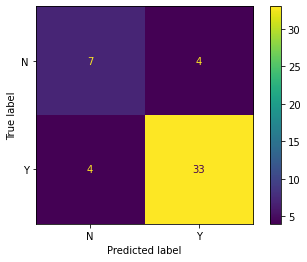

In [203]:
plot_confusion_matrix(rfc,X_test_scaled,y_test)

- Getting Overfitted

##  Boosted Random Forest

In [204]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [205]:
ada_model = AdaBoostClassifier()

In [206]:
gb_model= GradientBoostingClassifier()

In [207]:
ada_model.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [208]:
y_train_pred = ada_model.predict(X_train_scaled) 

In [209]:
metrics.accuracy_score(y_train, y_train_pred) 

0.8568075117370892

In [210]:
gb_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [211]:
y_train_pred_gb= gb_model.predict(X_train_scaled) 

In [212]:
metrics.accuracy_score(y_train, y_train_pred_gb) 

0.9131455399061033

In [213]:
ada_preds = ada_model.predict(X_test_scaled)

In [214]:
gb_pred = gb_model.predict(X_test_scaled)

**Ada boost results**

In [215]:
print(classification_report(y_train,y_train_pred)) ##Training Table

              precision    recall  f1-score   support

           N       0.89      0.62      0.73       133
           Y       0.85      0.97      0.90       293

    accuracy                           0.86       426
   macro avg       0.87      0.79      0.82       426
weighted avg       0.86      0.86      0.85       426



In [216]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

           N       0.46      0.55      0.50        11
           Y       0.86      0.81      0.83        37

    accuracy                           0.75        48
   macro avg       0.66      0.68      0.67        48
weighted avg       0.77      0.75      0.76        48



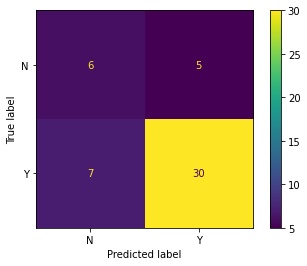

In [217]:
plot_confusion_matrix(ada_model,X_test_scaled,y_test)

**Gradient boost results**

In [218]:
print(classification_report(y_train,y_train_pred_gb)) ##Training Table

              precision    recall  f1-score   support

           N       1.00      0.72      0.84       133
           Y       0.89      1.00      0.94       293

    accuracy                           0.91       426
   macro avg       0.94      0.86      0.89       426
weighted avg       0.92      0.91      0.91       426



In [219]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           N       0.58      0.64      0.61        11
           Y       0.89      0.86      0.88        37

    accuracy                           0.81        48
   macro avg       0.74      0.75      0.74        48
weighted avg       0.82      0.81      0.82        48



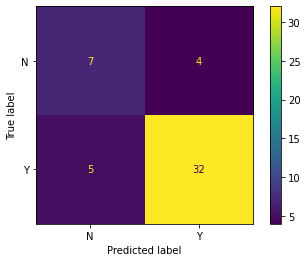

In [220]:
plot_confusion_matrix(gb_model,X_test_scaled,y_test)

- Gradient model seems performing better